# Multi-Layer Neural Network (using Keras)

In [0]:
#importing the required libraries
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import scipy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from keras import optimizers
# Importing Keras libraries
from keras.models import Sequential
from keras.layers import Dense


In [0]:
#Importing the data
from keras.datasets import fashion_mnist
(X_train,Y_train),(X_test,Y_test)=fashion_mnist.load_data()

In [0]:
Y_train=Y_train.reshape(-1,1)
X_train=X_train.reshape(60000,784)

X_test=X_test.reshape(-1,784)
Y_test=Y_test.reshape(-1,1)

In [0]:
X_train=X_train/255
X_test=X_test/255

In [0]:
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, train_size=0.50, random_state=100) #splitting the Test data according to Validate and Test

In [47]:
Y_train=Y_train.reshape(-1,1)
Y_train.shape

(60000, 1)

In [48]:
Y_test=Y_test.reshape(-1,1)
Y_test.shape

(5000, 1)

In [0]:
#to make the data of y_set onehot -flattening in 10 columns and mapping the class value with index of columns as 1 and rest of it as zero
def onehotscratch(Y_train):
    y_hotenc=np.zeros((Y_train.shape[0],10))
    for i in range(Y_train.shape[0]):
        value=Y_train[i][0]
        y_hotenc[i][value]=1
    return y_hotenc

In [0]:
Y_hotenc_train=onehotscratch(Y_train)
Y_hotenc_test=onehotscratch(Y_test)
Y_hotenc_val=onehotscratch(Y_val)

In [0]:
import tensorflow as tf

In [0]:


# define the keras model
def make_model(X_train,Y_hotenc_train,value):
  model_keras = Sequential()
  model_keras.add(Dense(100, input_dim=X_train.shape[1], activation='sigmoid'))
  model_keras.add(Dense(100, activation='relu'))
  model_keras.add(Dense(100, activation='relu'))
  model_keras.add(Dense(10, activation='softmax'))
  # compile the keras model
  model_keras.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
  # fit the keras model on the dataset
  Final_model=model_keras.fit(X_train, Y_hotenc_train, epochs=value, batch_size=1000)
  return Final_model,model_keras

Epoch 1/100
60000/60000 [==============================] - 2s 36us/step - loss: 2.2461 - acc: 0.2072
Epoch 2/100
60000/60000 [==============================] - 1s 19us/step - loss: 2.1387 - acc: 0.3694
Epoch 3/100
60000/60000 [==============================] - 1s 20us/step - loss: 2.0224 - acc: 0.4454
Epoch 4/100
60000/60000 [==============================] - 1s 19us/step - loss: 1.8754 - acc: 0.4952
Epoch 5/100
60000/60000 [==============================] - 1s 23us/step - loss: 1.7116 - acc: 0.5280
Epoch 6/100
60000/60000 [==============================] - 1s 21us/step - loss: 1.5578 - acc: 0.5587
Epoch 7/100
60000/60000 [==============================] - 2s 26us/step - loss: 1.4251 - acc: 0.5909
Epoch 8/100
60000/60000 [==============================] - 1s 23us/step - loss: 1.3172 - acc: 0.6106
Epoch 9/100
60000/60000 [==============================] - 1s 23us/step - loss: 1.2292 - acc: 0.6267
Epoch 10/100
60000/60000 [==============================] - 2s 25us/step - loss: 1.1566 - a

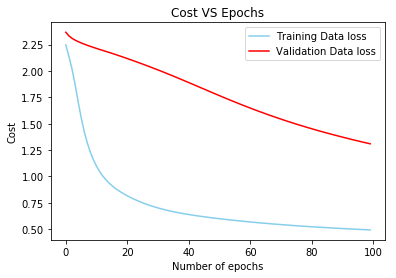

In [53]:

## Hyper Paramters as Epoch =100, Learning Rate=0.08
## Training Data
Final_model_tr1,model_keras_tr1=make_model(X_train,Y_hotenc_train,100)
## Validation Data
Final_model_val1,model_keras_val1=make_model(X_val,Y_hotenc_val,100)

## Plotting of accuracy and cost vs epochs
_, accuracy_tr1 = model_keras_tr1.evaluate(X_train, Y_hotenc_train)
print("Accuracy with training data\n",accuracy_tr1*100,"%\n\n")
_, accuracy_val1 = model_keras_val1.evaluate(X_val, Y_hotenc_val)
print("Accuracy with validation data\n",accuracy_val1*100,"%\n\n")
plt.title('Cost VS Epochs')
plt.xlabel('Number of epochs')
plt.ylabel('Cost')
plt.plot(Final_model_tr1.history['loss'],color='skyblue',label = "Training Data loss")
plt.plot(Final_model_val1.history['loss'],color='red',label = "Validation Data loss")
plt.legend()




Epoch 1/200
60000/60000 [==============================] - 3s 49us/step - loss: 2.2858 - acc: 0.1763
Epoch 2/200
60000/60000 [==============================] - 1s 20us/step - loss: 2.2039 - acc: 0.3795
Epoch 3/200
60000/60000 [==============================] - 1s 19us/step - loss: 2.1233 - acc: 0.4644
Epoch 4/200
60000/60000 [==============================] - 1s 19us/step - loss: 2.0178 - acc: 0.4910
Epoch 5/200
60000/60000 [==============================] - 1s 19us/step - loss: 1.8773 - acc: 0.5033
Epoch 6/200
60000/60000 [==============================] - 1s 19us/step - loss: 1.7283 - acc: 0.5348
Epoch 7/200
60000/60000 [==============================] - 1s 20us/step - loss: 1.5836 - acc: 0.5663
Epoch 8/200
60000/60000 [==============================] - 1s 19us/step - loss: 1.4572 - acc: 0.5931
Epoch 9/200
60000/60000 [==============================] - 1s 20us/step - loss: 1.3523 - acc: 0.6195
Epoch 10/200
60000/60000 [==============================] - 1s 20us/step - loss: 1.2651 - a

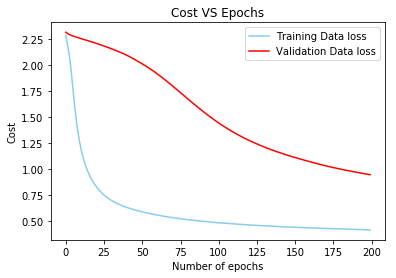

In [54]:
## Hyper Paramters as Epoch =200, Learning Rate=0.08
## Training Data
Final_model_tr2,model_keras_tr2=make_model(X_train,Y_hotenc_train,200)
## Validation Data
Final_model_val2,model_keras_val2=make_model(X_val,Y_hotenc_val,200)

## Plotting of accuracy and cost vs epochs
_, accuracy_tr2 = model_keras_tr2.evaluate(X_train, Y_hotenc_train)
print("Accuracy with training data\n",accuracy_tr2*100,"%\n\n")
_, accuracy_val2 = model_keras_val2.evaluate(X_val, Y_hotenc_val)
print("Accuracy with validation data\n",accuracy_val2*100,"%\n\n")
plt.title('Cost VS Epochs')
plt.xlabel('Number of epochs')
plt.ylabel('Cost')
plt.plot(Final_model_tr2.history['loss'],color='skyblue',label = "Training Data loss")
plt.plot(Final_model_val2.history['loss'],color='red',label = "Validation Data loss")
plt.legend()

Epoch 1/300
60000/60000 [==============================] - 3s 51us/step - loss: 2.2709 - acc: 0.1731
Epoch 2/300
60000/60000 [==============================] - 2s 26us/step - loss: 2.1856 - acc: 0.3275
Epoch 3/300
60000/60000 [==============================] - 2s 26us/step - loss: 2.0959 - acc: 0.4074
Epoch 4/300
60000/60000 [==============================] - 2s 25us/step - loss: 1.9792 - acc: 0.4633
Epoch 5/300
60000/60000 [==============================] - 2s 25us/step - loss: 1.8387 - acc: 0.5183
Epoch 6/300
60000/60000 [==============================] - 2s 26us/step - loss: 1.6970 - acc: 0.5478
Epoch 7/300
60000/60000 [==============================] - 2s 25us/step - loss: 1.5648 - acc: 0.5703
Epoch 8/300
60000/60000 [==============================] - 2s 26us/step - loss: 1.4474 - acc: 0.5911
Epoch 9/300
60000/60000 [==============================] - 2s 26us/step - loss: 1.3456 - acc: 0.6145
Epoch 10/300
60000/60000 [==============================] - 2s 26us/step - loss: 1.2583 - a

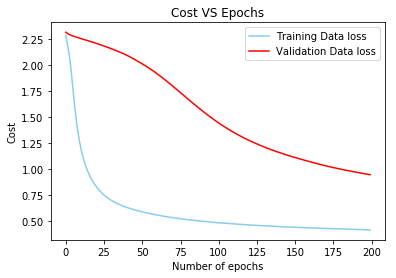

In [55]:
## Hyper Paramters as Epoch =300, Learning Rate=0.08
## Training Data
Final_model_tr3,model_keras_tr3=make_model(X_train,Y_hotenc_train,300)
## Validation Data
Final_model_val3,model_keras_val3=make_model(X_val,Y_hotenc_val,300)

## Plotting of accuracy and cost vs epochs
_, accuracy_tr3 = model_keras_tr3.evaluate(X_train, Y_hotenc_train)
print("Accuracy with training data\n",accuracy_tr3*100,"%\n\n")
_, accuracy_val3 = model_keras_val3.evaluate(X_val, Y_hotenc_val)
print("Accuracy with validation data\n",accuracy_val3*100,"%\n\n")
plt.title('Cost VS Epochs')
plt.xlabel('Number of epochs')
plt.ylabel('Cost')
plt.plot(Final_model_tr2.history['loss'],color='skyblue',label = "Training Data loss")
plt.plot(Final_model_val2.history['loss'],color='red',label = "Validation Data loss")
plt.legend()

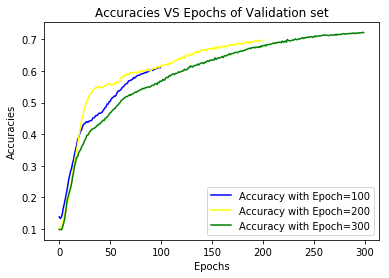

In [65]:
plt.title('Accuracies VS Epochs of Validation set')
plt.xlabel('Epochs')
plt.ylabel('Accuracies')
plt.plot(Final_model_val1.history['acc'],color='blue',label = "Accuracy with Epoch=100")
plt.plot(Final_model_val2.history['acc'],color='yellow',label = "Accuracy with Epoch=200")
plt.plot(Final_model_val3.history['acc'],color='green',label = "Accuracy with Epoch=300")
plt.legend()

In [58]:
# evaluate the keras model
_, accuracy = model_keras_tr3.evaluate(X_test, Y_hotenc_test)
print("Accuracy with test data :\n",accuracy*100,"%") #checking accuracy of the test data


5000/5000 [==============================] - 0s 46us/step
Accuracy with test data :
 85.02 %


In [59]:
confusion_matrix(Y_test,model_keras.predict_classes(X_test)) #to get the confusion matrix of the test data

array([[405,   1,   4,  28,   2,   1,  52,   0,   4,   0],
       [  3, 466,   5,  15,   3,   0,   1,   0,   0,   0],
       [  7,   2, 364,   6,  72,   0,  45,   0,   3,   0],
       [ 13,   7,   3, 437,  12,   0,  18,   0,   0,   0],
       [  0,   1,  41,  21, 385,   0,  45,   0,   2,   0],
       [  0,   0,   0,   1,   0, 432,   0,  26,   0,  18],
       [ 65,   1,  54,  23,  42,   1, 308,   0,  15,   0],
       [  0,   0,   0,   0,   0,  16,   0, 471,   0,  25],
       [  1,   0,   2,   6,   2,   3,   9,   2, 466,   0],
       [  0,   0,   0,   0,   0,   9,   0,  22,   1, 505]])

In [60]:
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']
print(classification_report(Y_test, model_keras.predict_classes(X_test),target_names=target_names)) ## to get the classification report of the test data

              precision    recall  f1-score   support

     class 0       0.82      0.81      0.82       497
     class 1       0.97      0.95      0.96       493
     class 2       0.77      0.73      0.75       499
     class 3       0.81      0.89      0.85       490
     class 4       0.74      0.78      0.76       495
     class 5       0.94      0.91      0.92       477
     class 6       0.64      0.61      0.62       509
     class 7       0.90      0.92      0.91       512
     class 8       0.95      0.95      0.95       491
     class 9       0.92      0.94      0.93       537

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000

